In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

In [3]:
df = pd.read_csv('cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [4]:
features_response = df.columns.tolist()

In [5]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [6]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [8]:
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [9]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [10]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
dot_data = tree.export_graphviz(dt, out_file=None, filled=True,
                                rounded=True, feature_names=features_response[:-1],
                                proportion=True, class_names=['Not defaulted', 'Defaulted'])

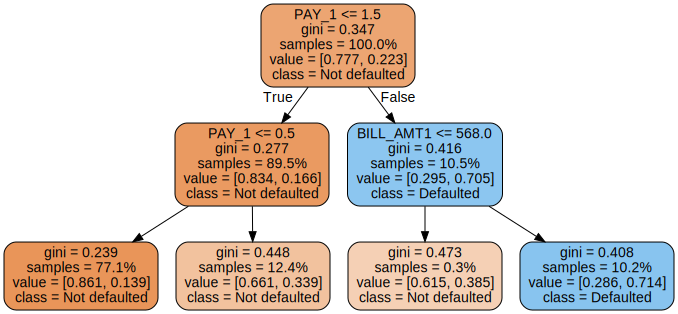

In [12]:
graph = graphviz.Source(dot_data) 
graph

In [13]:
features_response[:-1].index('PAY_1')

4

In [14]:
X_train.shape

(21331, 17)

In [15]:
sum(X_train[:,4] <= 1.5)/X_train.shape[0]

0.8946134733486475

In [16]:
np.mean(y_train)

0.223102526838873

In [17]:
pm0 = np.linspace(0.01,0.99,99)

In [18]:
pm1 = 1 - pm0
misclassification_rate = np.minimum(pm0, pm1)

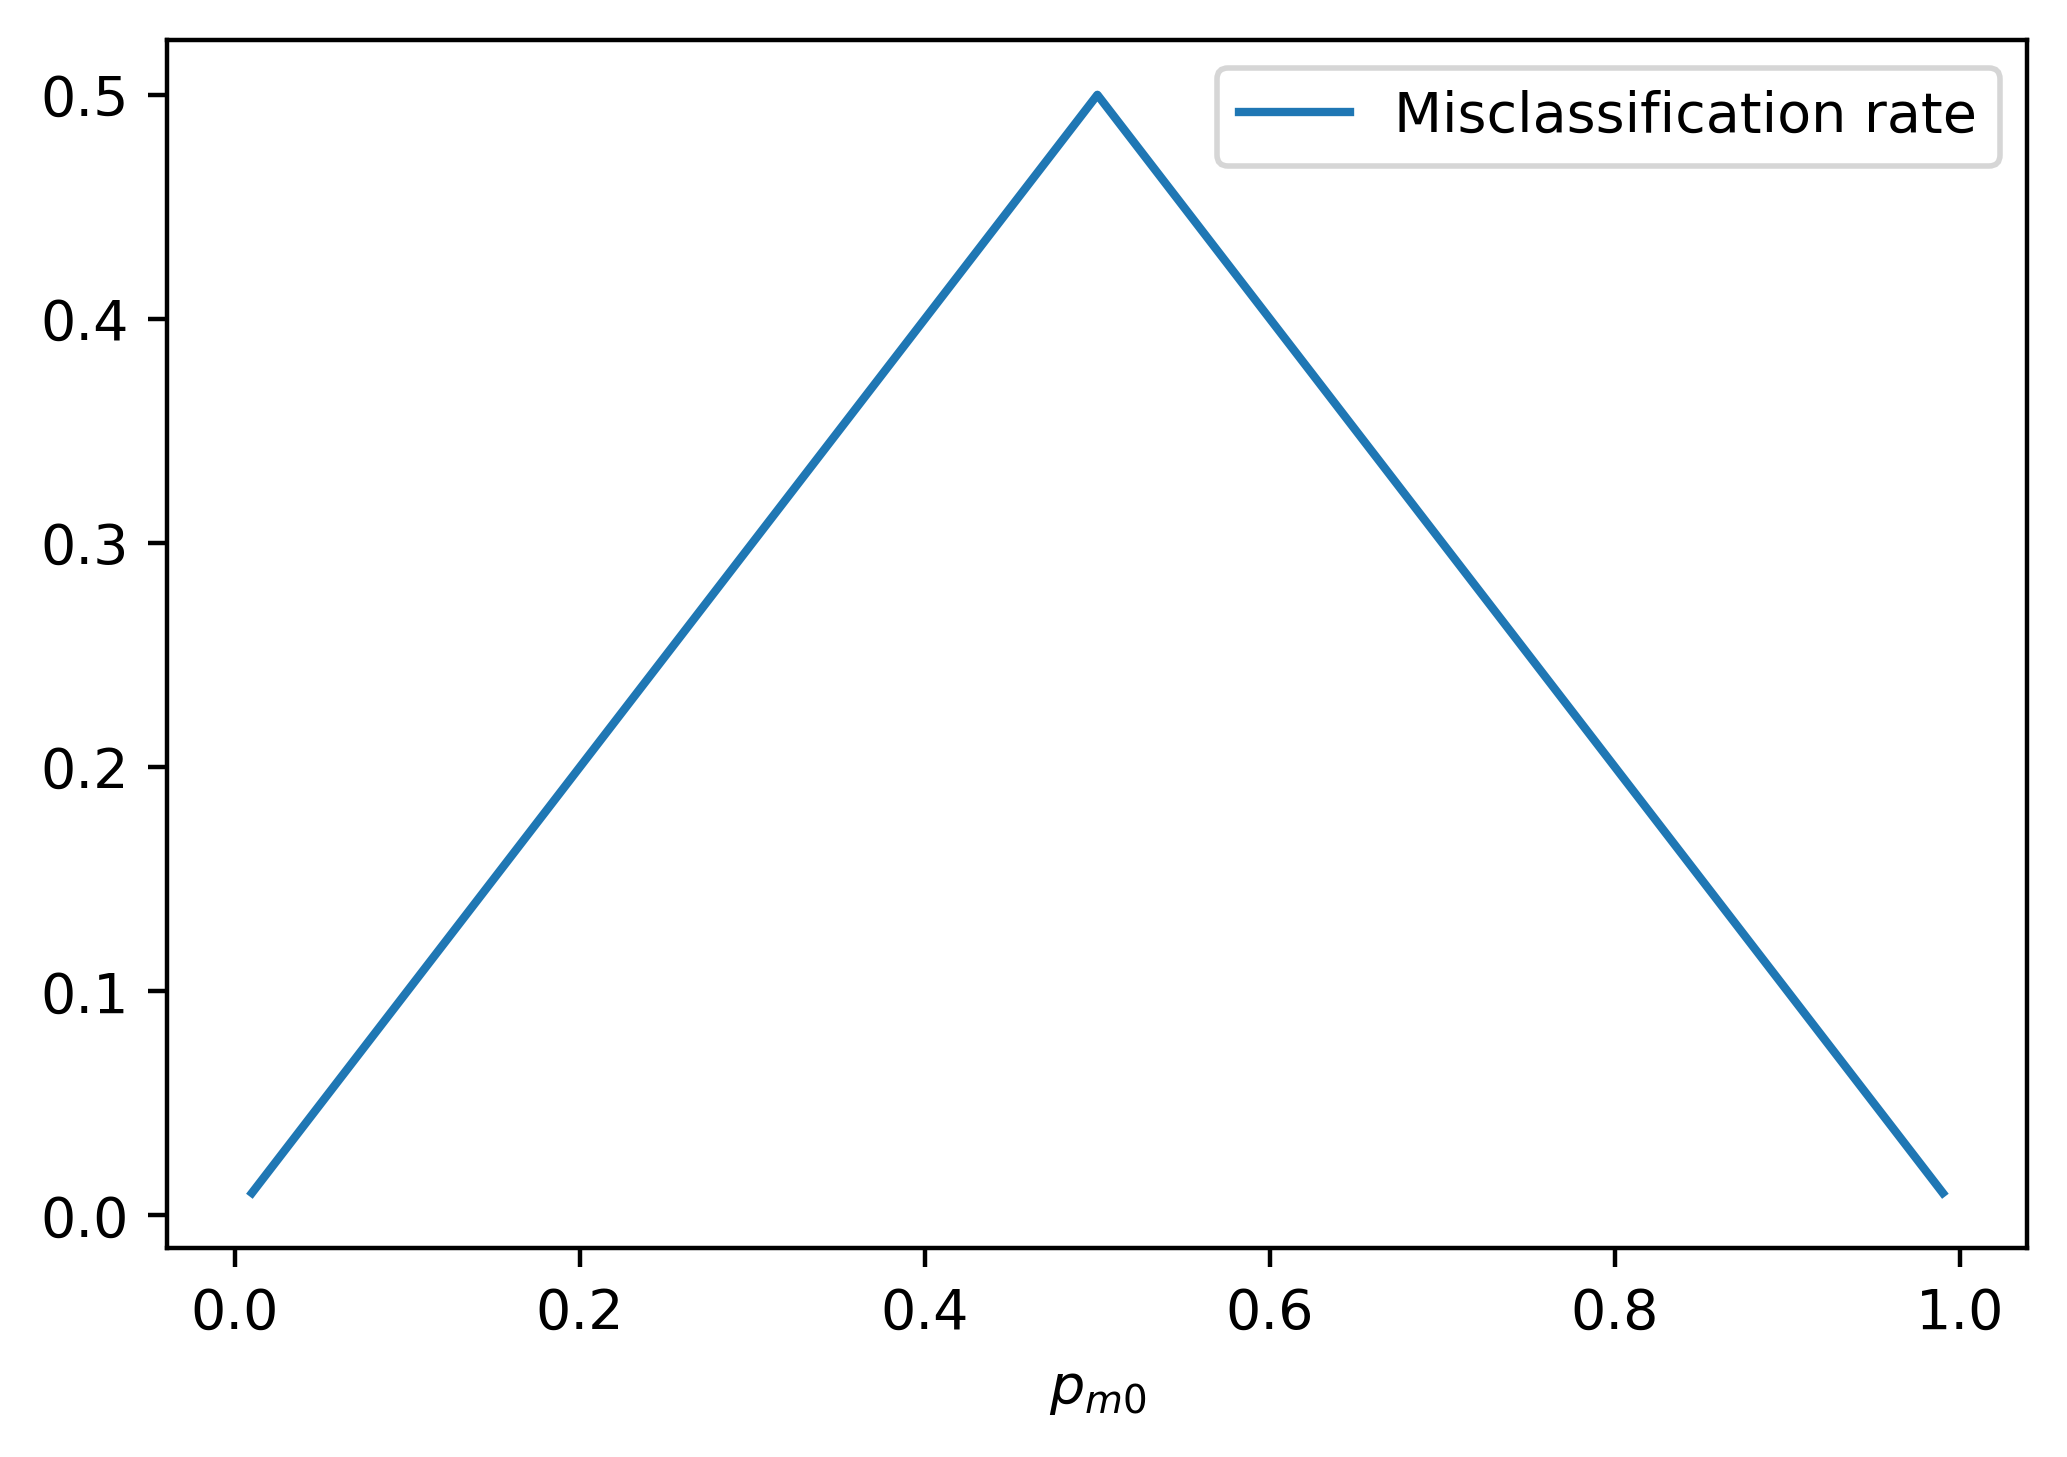

In [19]:
mpl.rcParams['figure.dpi'] = 400
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.xlabel('$p_{m0}$')
plt.legend()

In [20]:
gini = (pm0*(1-pm0)) + (pm1*(1-pm1))

In [21]:
cross_ent = -1*((pm0*np.log(pm0)) + (pm1*np.log(pm1)))

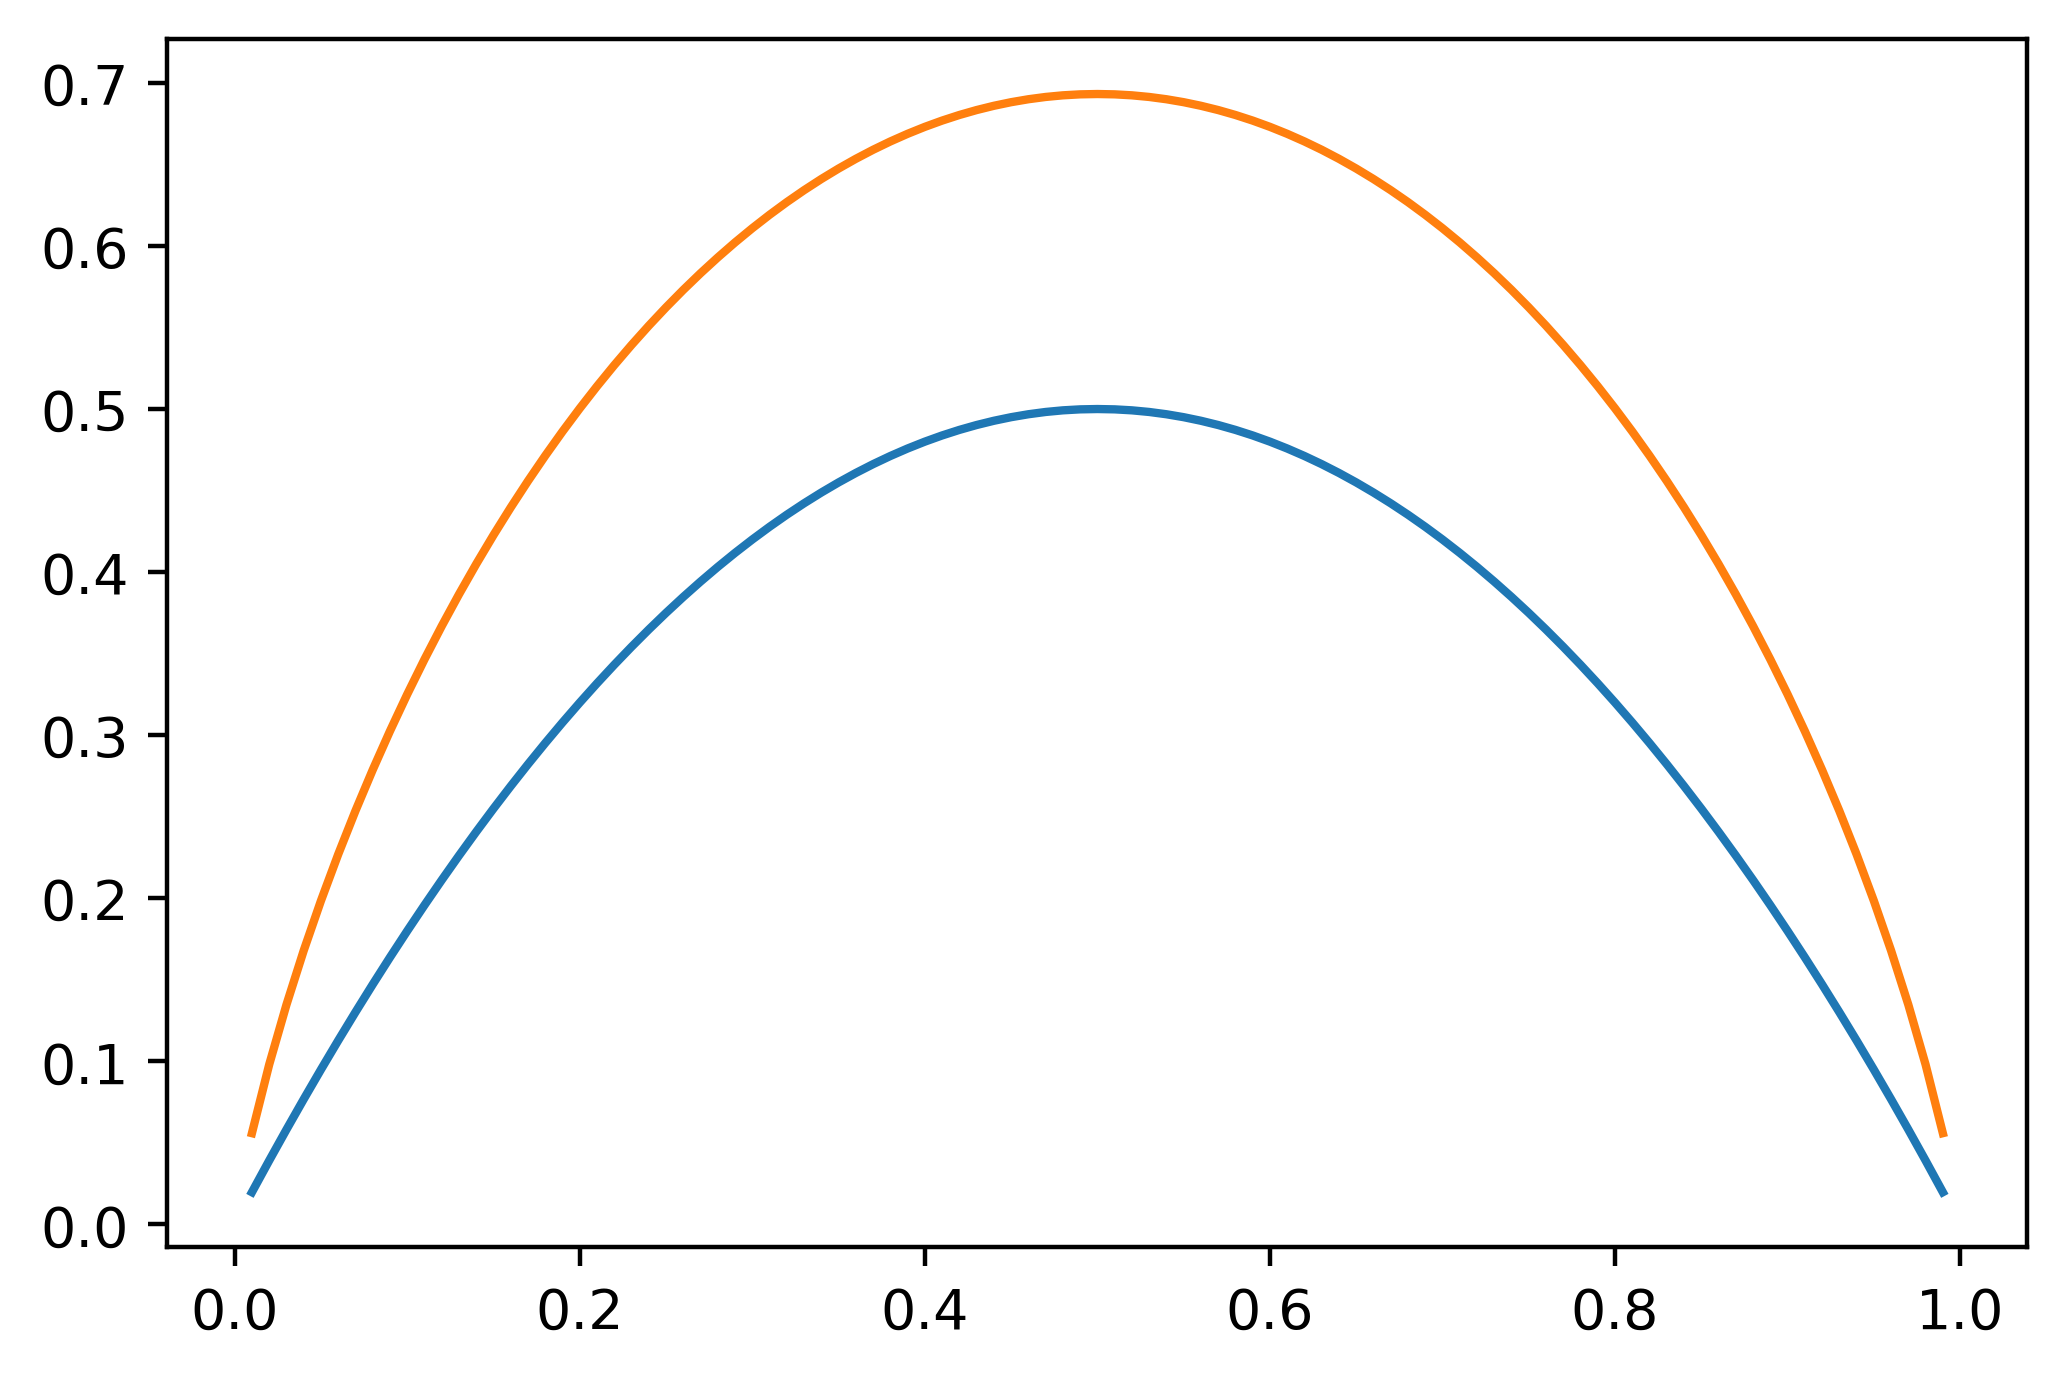

In [22]:
plt.plot(pm0, gini, label='Gini impurity')
plt.plot(pm0, cross_ent, label='Cross entropy')

# Finding Optimal Hyperparameters for a Decision Tree


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
X_train.shape

(21331, 17)

In [25]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}

In [26]:
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, iid=False, refit=True, cv=4, verbose=1,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [27]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    5.4s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid=False, n_jobs=None,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, refit=True, return_train_score=True,
             scoring='r

In [28]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.030034,0.005258,0.011074,0.006480,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.064975,0.005251,0.000790,0.001369,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.109805,0.006075,0.000748,0.001295,4,{'max_depth': 4},0.732720,0.741078,0.746946,0.743731,0.741119,0.005276,2,0.756882,0.752421,0.749368,0.753055,0.752932,0.002673
3,0.163911,0.005942,0.004751,0.002144,6,{'max_depth': 6},0.744848,0.745757,0.750391,0.740677,0.745418,0.003451,1,0.782202,0.780125,0.775228,0.774750,0.778076,0.003178
4,0.308363,0.050818,0.006899,0.005041,8,{'max_depth': 8},0.728273,0.733708,0.748781,0.730763,0.735381,0.007972,3,0.811958,0.808353,0.803345,0.802004,0.806415,0.003980
5,0.291894,0.014610,0.007147,0.004909,10,{'max_depth': 10},0.711332,0.706238,0.719768,0.714360,0.712925,0.004902,4,0.848814,0.853754,0.841139,0.836071,0.844945,0.006816
6,0.311362,0.032322,0.003989,0.000001,12,{'max_depth': 12},0.673041,0.656867,0.673290,0.676215,0.669853,0.007601,6,0.890111,0.903489,0.885646,0.876089,0.888834,0.009862


In [29]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

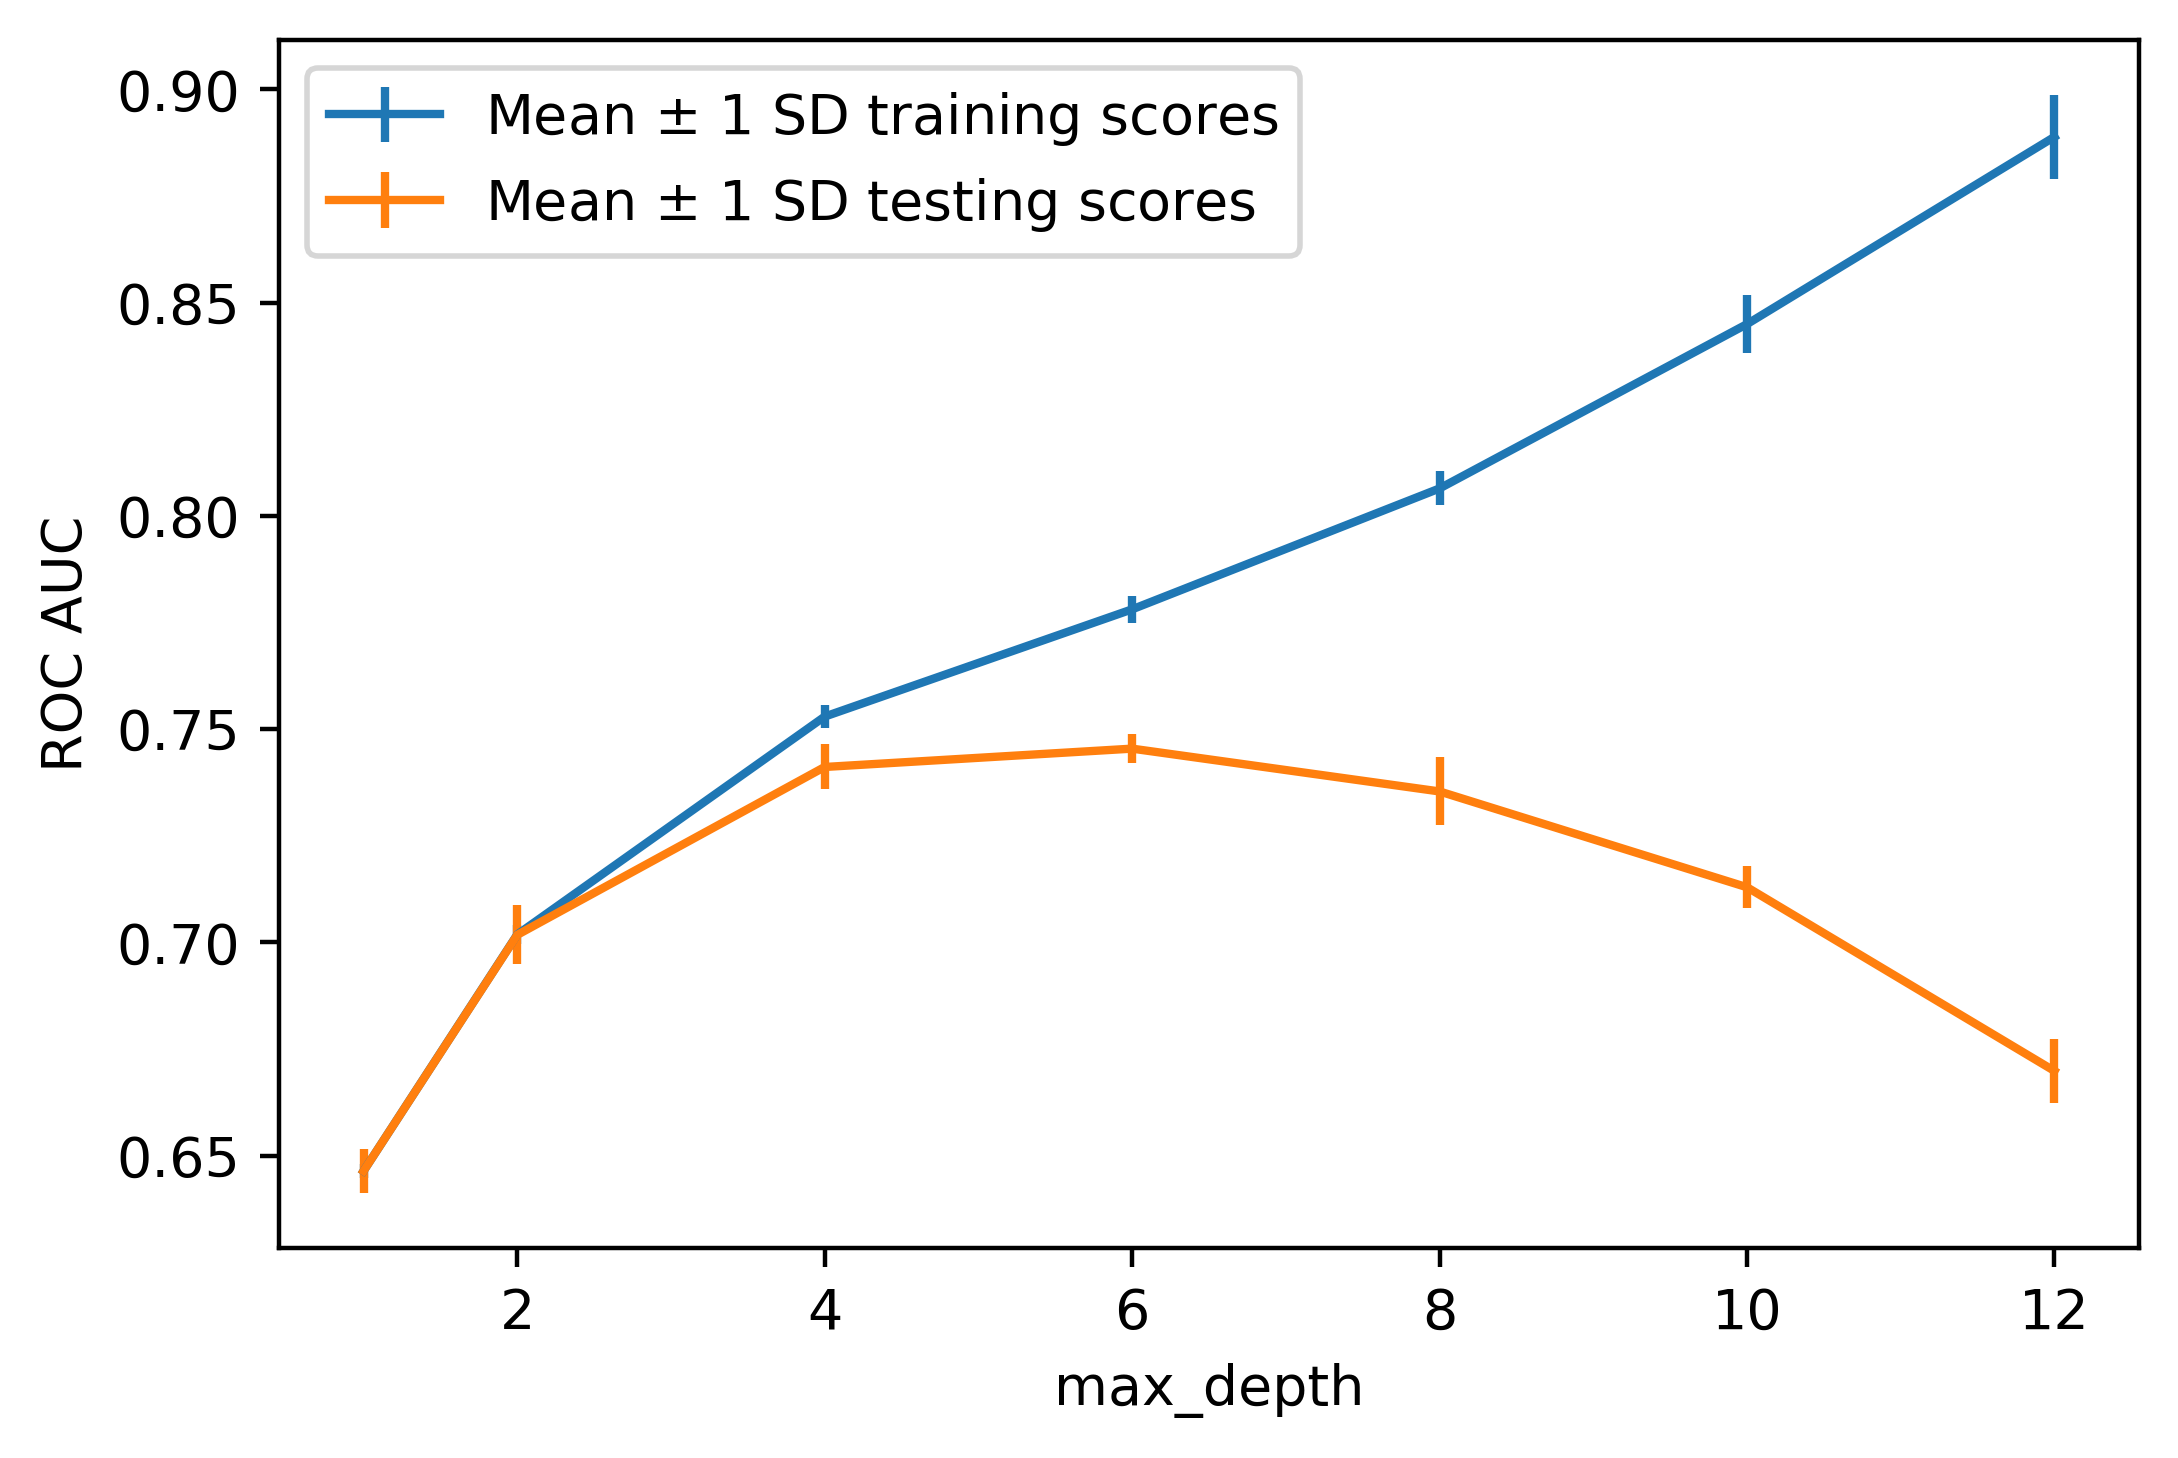

In [30]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')